In [16]:
#
# mathematische Pendel
#
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
#

g=9.81
l=1

omega0 = np.sqrt(g/l)

mu=1/6*omega0**2
#
# returns a time set for numerical integration
# t_span :  tuple with start and end value
# t : numpy ndarray with values for time
# T : periodicity
def time_set(omega):
    T = 2*np.pi/omega
    t_end=5*T
    t_start=0
    delta = T/100
    
    t_span = (t_start, t_end)
    t = np.arange(t_start, t_end, delta)
    return [t_span, t, T]
#



In [17]:
# returns the rhs for the penduulum as 1st order system
def pendel(t, state):
    [x,v] = state
    dx = v
    dv= - g/l*np.sin(x)
    return [dx, dv]
#

[3, -8.920207757159938]

In [18]:
# returns an event for the detection of turning points
def v_event(t, state):
    return state[1]
v_event.direction = -1 # set the direction of the event so that only positive values are found
#

In [37]:
[t_span, t, T] = time_set(omega0)
#

x0s = [0.1,0.2 ,0.3 ,0.5, 0.8, 1.0 , 1.2, 1.5, 2.0 ,3, 3.5, 4, 5 ]
freqs = [0]*len(x0s) 
#
refs = [ omega0 *np.sqrt(1+3/4*mu/omega0**2*x0**2)for x0 in x0s] # reference solution from perturbation theory
#
for i,x0 in enumerate(x0s):
#
    results_ivp_pendel = solve_ivp(pendel, t_span, [x0,0], method='RK45',t_eval=t, max_step=0.01, events=v_event) # numerical integration
    t_event = results_ivp_pendel.t_events[0] # time values of events
    x_event = results_ivp_pendel.y_events[0][:,0] # amplitude values of events
    #
    Ts = np.diff(t_event) # time between events
    T = Ts.mean() # average value of Ts
    freqs[i] = 2*np.pi/T # frequency
#
results_ivp_pendel.t_events[0]

array([1.11719139, 3.35157417, 5.58595696, 7.82033974])

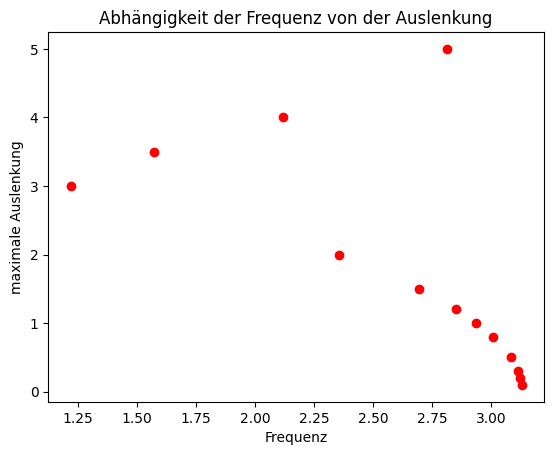

In [38]:
#
fig = plt.figure()
#
ax = fig.add_subplot(1, 1, 1)
#ax.plot(refs,x0s,color='blue')
ax.plot(freqs,x0s,marker = 'o',markerfacecolor='red',markeredgecolor='red',linestyle = 'None')
ax.set_ylabel("maximale Auslenkung")
ax.set_xlabel("Frequenz")
ax.set_title('Abhängigkeit der Frequenz von der Auslenkung')
#
plt.show()